In [1]:
from radial_turbine import RadialTurbine
import  matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from itertools import product
import numpy as np
from multiprocessing import cpu_count, Pool
import warnings
warnings.filterwarnings('ignore')


In [2]:
dfturbine = pd.read_csv("EulerTurbineData.txt", sep='\t')

alpha2_vec = dfturbine['state2_kinematic_alpha'].unique()
omega_vec = dfturbine['omega'].sort_values().unique()
R_vec = dfturbine['R'].sort_values().unique()
h2_vec = dfturbine['state2_height'].sort_values().unique()
h3_vec = dfturbine['state3_height'].sort_values().unique()
a3_vec = dfturbine['state3_area'].sort_values().unique()
h2_vec
# a3_vec

array([0.005, 0.006, 0.007, 0.008, 0.009])

In [12]:
def filter_df(df, c1, f1,c2, f2,c3, f3):
    return df[
    (abs(df[c1]-f1)<1e-10) &
    (abs(df[c2]-f2)<1e-10) &
    (abs(df[c3]-f3)<1e-10) 
    ]
def plot_contour(df, cx, cy, cz, c1, f1, c2, f2, c3, f3):
    df_filter = filter_df(df, c1, f1, c2, f2, c3, f3)
    hdf = df_filter.groupby([cx,cy])[[cz]].mean()
    hdfreset = hdf.reset_index()
    hdfreset.columns = [cx, cy, cz]
    hdfpivot=hdfreset.pivot(cx,cy)
    X=hdfpivot.columns.levels[1].values
    Y=hdfpivot.index.values
    Z=hdfpivot.values
    Xi,Yi = np.meshgrid(X, Y)
    fig, ax = plt.subplots()
    CS = ax.contourf(Yi, Xi, Z, 10,alpha=0.7, cmap=plt.cm.jet)
    cbar = plt.colorbar(CS)
    cbar.ax.set_ylabel("test", fontsize=20)
    ax.set_xlabel("test", fontsize=20)
    ax.set_ylabel("test", fontsize=20)
    return fig,ax


In [13]:
df_filtered = filter_df(dfturbine,
          "state2_kinematic_alpha", 
          alpha2_vec[0],
          "omega", 
          omega_vec[0],
          "R", 
          R_vec[0]
         )

df_filtered2 = filter_df(dfturbine,
          "state2_kinematic_alpha", 
          alpha2_vec[1],
          "state2_height", 
          h2_vec[4],
          "state3_height", 
          h3_vec[0]
         )


(<matplotlib.figure.Figure at 0x7f5dde049410>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5dd98db2d0>)

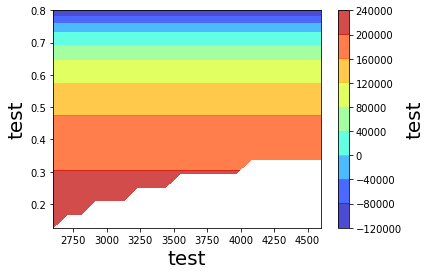

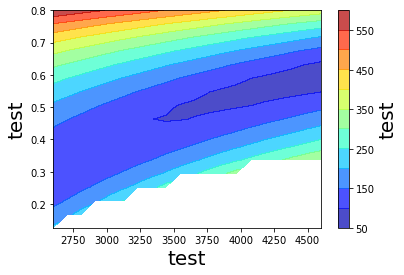

In [28]:
# hdf = df_filtered.groupby(["state2_height","state3_height"])[["work"]].mean()
fig, ax = plot_contour(dfturbine, 
             "omega", "R", "state3_thermodynamic_static_H", 
             "state2_kinematic_alpha", alpha2_vec[0],
             "state2_height", h2_vec[0],
             "state3_height", h3_vec[0]
             )
plot_contour(dfturbine, 
             "omega", "R", "state3_kinematic_beta_mag", 
             "state2_kinematic_alpha", alpha2_vec[0],
             "state2_height", h2_vec[0],
             "state3_height", h3_vec[0]
             )


In [286]:
df_filtered2 = filter_df(dfturbine,
          "state2_kinematic_alpha", 
          alpha2_vec[1],
          "state2_height", 
          h2_vec[4],
          "state3_height", 
          h3_vec[0]
         )
df_filtered2.groupby(["R","omega"])[["state2_kinematic_c_mag"]].mean()

state2_kinematic_c_mag
R        omega                              
0.084211 2600.000000              447.828687
0.126316 2600.000000              447.828687
         2705.263158              447.828687
         2810.526316              447.828687
0.168421 2600.000000              447.828687
         2705.263158              447.828687
         2810.526316              447.828687
         2915.789474              447.828687
         3021.052632              447.828687
0.210526 2600.000000              447.828687
         2705.263158              447.828687
         2810.526316              447.828687
         2915.789474              447.828687
         3021.052632              447.828687
         3126.315789              447.828687
         3231.578947              447.828687
         3336.842105              447.828687
0.252632 2600.000000              447.828687
         2705.263158              447.828687
         2810.526316              447.828687
         2915.789474              447.828687
         3021.052632              447.828687
         3126.315789              447.828687
         3231.578947              447.828687
         3336.842105              447.828687
         3442.105263              447.828687
         3547.368421              447.828687
         3652.631579              447.828687
         3757.894737              447.828687
0.294737 2600.000000              447.828687
...                                      ...
0.715789 3652.631579              447.828687
         3757.894737              447.828687
         3863.157895              447.828687
         3968.421053              447.828687
         4073.684211              447.828687
         4178.947368              447.828687
         4284.210526              447.828687
         4389.473684              447.828687
         4494.736842              447.828687
         4600.000000              447.828687
0.800000 2600.000000              447.828687
         2705.263158              447.828687
         2810.526316              447.828687
         2915.789474              447.828687
         3021.052632              447.828687
         3126.315789              447.828687
         3231.578947              447.828687
         3336.842105              447.828687
         3442.105263              447.828687
         3547.368421              447.828687
         3652.631579              447.828687
         3757.894737              447.828687
         3863.157895              447.828687
         3968.421053              447.828687
         4073.684211              447.828687
         4178.947368              447.828687
         4284.210526              447.828687
         4389.473684              447.828687
         4494.736842              447.828687
         4600.000000              447.828687

[265 rows x 1 columns]

In [270]:
h2_vec

array([0.005, 0.006, 0.007, 0.008, 0.009])

state2_height
0.005    Axes(0.125,0.125;0.775x0.755)
0.006    Axes(0.125,0.125;0.775x0.755)
0.007    Axes(0.125,0.125;0.775x0.755)
0.008    Axes(0.125,0.125;0.775x0.755)
0.009    Axes(0.125,0.125;0.775x0.755)
dtype: object

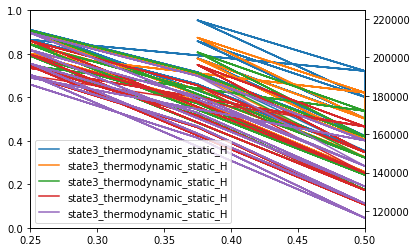

In [12]:
# dfplot = dfturbine.dropna()
# fig, ax = plt.subplots()
# ax2 = ax.twinx()
# dfplot[abs(dfplot['omega']-2600)<1e-6]['state2_height']
# dfplot[abs(dfplot['omega']-3200)<1e-6].groupby(['state2_area']).plot(x='R', y='state3_kinematic_alpha', ax= ax)
# dfplot[abs(dfplot['omega']-3200)<1e-6].groupby(['state2_height']).plot(x='R', y='state3_kinematic_w_mag', ax= ax2)
# dfplot[abs(dfplot['omega']-3200)<1e-6].groupby(['state2_height']).plot(x='R', y='state3_thermodynamic_static_H', ax= ax2)

#dfplot.groupby("state2_kinematic_alpha").plot(x='R', y='state3_kinematic_alpha', ax= ax2)
# dfplot.groupby("state2_height").plot(x='R', y='state2_thermodynamic_static_H', ax= ax2, color='g')
# dfplot.plot(x='R', y='state3_thermodynamic_static_H', ax= ax2, color='r')

omega
2600.0    Axes(0.125,0.125;0.775x0.755)
2750.0    Axes(0.125,0.125;0.775x0.755)
2900.0    Axes(0.125,0.125;0.775x0.755)
3050.0    Axes(0.125,0.125;0.775x0.755)
3200.0    Axes(0.125,0.125;0.775x0.755)
dtype: object

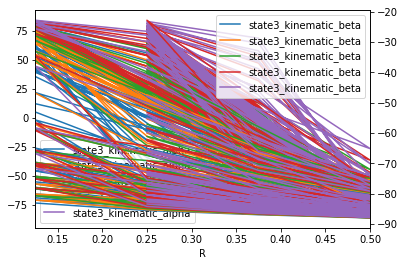

In [230]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

dfplot[abs(dfplot['state2_height']-9e-3)<1e-6].groupby("omega").plot(x='R', y='state3_kinematic_alpha', ax= ax)
dfplot[abs(dfplot['state2_height']-9e-3)<1e-6].groupby("omega").plot(x='R', y='state3_kinematic_beta', ax= ax2)


state2_height
0.005000    Axes(0.125,0.125;0.775x0.755)
0.005444    Axes(0.125,0.125;0.775x0.755)
0.005889    Axes(0.125,0.125;0.775x0.755)
0.006333    Axes(0.125,0.125;0.775x0.755)
0.006778    Axes(0.125,0.125;0.775x0.755)
0.007222    Axes(0.125,0.125;0.775x0.755)
0.007667    Axes(0.125,0.125;0.775x0.755)
0.008111    Axes(0.125,0.125;0.775x0.755)
0.008556    Axes(0.125,0.125;0.775x0.755)
0.009000    Axes(0.125,0.125;0.775x0.755)
dtype: object

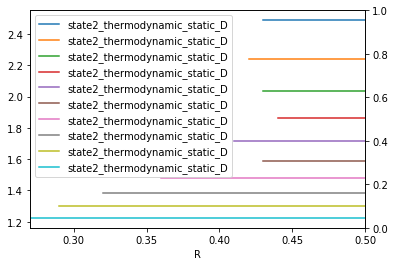

In [59]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
dfplot[abs(dfplot['omega']-3200)<1e-6].groupby("state2_height").plot(x='R', y='state2_thermodynamic_static_D', ax= ax)
# dfplot[abs(dfplot['state2_height']-9e-3)<1e-6].plot(x='R', y='state2_kinematic_beta', ax= ax2)


In [ ]:
dfplot = dfturbine.dropna()
fig, ax = plt.subplots()
ax2 = ax.twinx()
dfplot.plot(x='R', y='work', ax= ax)
dfplot.plot(x='R', y='state3_kinematic_alpha', ax= ax2, color='g')
dfplot.plot(x='R', y='state3_kinematic_beta', ax= ax2, color='r')

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
dfturbine.dropna().plot(x='R', y='state3_kinematic_w_mag', ax= ax)
dfturbine.dropna().plot(x='R', y='state3_kinematic_c_mag', ax= ax2, color='g')

In [ ]:
dfturbine

In [ ]:
dfturbine.columns

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
dfturbine.dropna().plot(x='R', y='state2_kinematic_alpha', ax= ax)
dfturbine.dropna().plot(x='R', y='state3_kinematic_alpha', ax= ax2, color='g')

In [ ]:
DOR = np.linspace(0.29, 0.7, 100)
work = []
for dor in DOR:
    turbine = RadialTurbine(omega, h1, h2, h3, r1, r2, r3, P1, T1, C1, alpha1, alpha2, P3, dor)
    work.append(turbine.work_enthalpy)


In [ ]:
plt.plot(DOR, work)

In [ ]:
DOR = np.linspace(0.27, 0.7, 100)
work = []
h1 = 0.002
alpha2=80

for dor in DOR:
    turbine = RadialTurbine(omega, h1, h2, h3, r1, r2, r3, P1, T1, C1, alpha1, alpha2, P3, dor)
    work.append(turbine.work_enthalpy)

In [ ]:
plt.plot(DOR, work)

In [ ]:
DOR = np.linspace(0.3, 0.7, 100)
work = []
h1 = 0.002
alpha2=82

for dor in DOR:
    turbine = RadialTurbine(omega, h1, h2, h3, r1, r2, r3, P1, T1, C1, alpha1, alpha2, P3, dor)
    work.append(turbine.work_enthalpy)

In [ ]:
plt.plot(DOR, work)